In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Import Libraries 📚


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Dataset 💾


In [4]:
data = pd.read_csv("Algerian_forest_fires_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [6]:
data.shape

(247, 14)

## 3. Check for Missing Values 🕵️‍♀️


In [7]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## 4. Inspecting Specific Rows by Label 🔍


In [8]:
data.loc[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


## 5. Removing Rows with null values and Resetting Index 🗑️🔄


In [9]:
data=data.drop(index=[122,123,124,168]).reset_index(drop=True)

## 6. Creating a New 'Region' Column 🗺️

In [10]:
data.loc[:122,"Region"] = 0
data.loc[122:,"Region"] = 1

## 7. Cleaning Column Names ✨

In [11]:
print(data.columns)
data.columns = data.columns.str.strip()
print(data.columns)

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


## 8. Data Type Conversion 🔢

In [12]:
data[['day','month','year','Temperature','RH','Ws']] = data[['day','month','year','Temperature','RH','Ws']].astype(int)
data[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = data[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

## 9. Cleaning and Analyzing the 'Classes' Column (Target Variable) 🔥

In [13]:
data['Classes'] = data['Classes'].str.strip()
data['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


## saved the cleaned file


In [15]:
# saved the cleaned file
data.to_csv("Algerian_forest_fires_dataset_cleaned.csv",index=False)

# Exploratory Data Analytics ⚒️

## 11. Visualizing Class Distribution: Fire vs. No-Fire 🔥📊

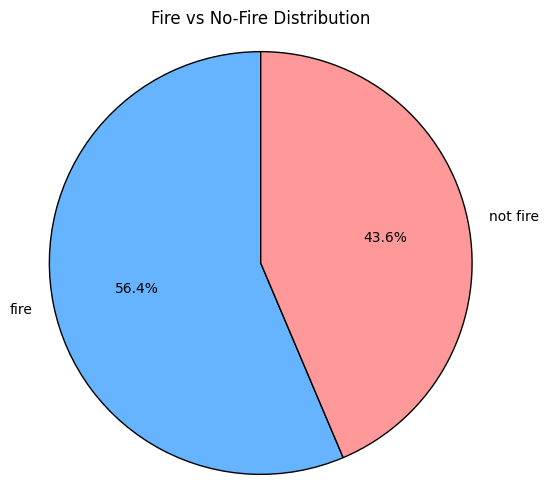

In [17]:

class_counts = data['Classes'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts,
        labels=class_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999'],
        wedgeprops={'edgecolor': 'black'})
plt.title('Fire vs No-Fire Distribution')
plt.axis('equal')
plt.show()


## 12. Monthly Fire Weather Index (FWI) Distribution 🗓️🔥

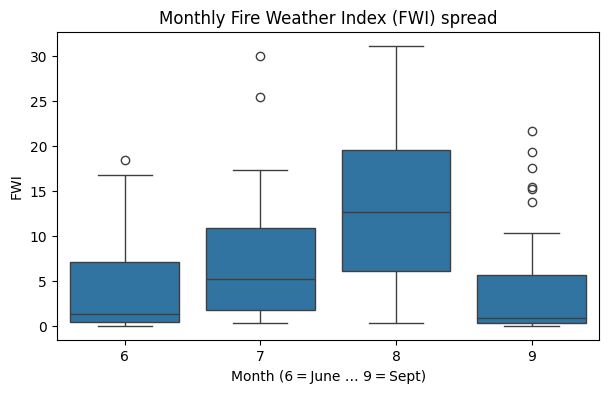

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(data=data, x='month', y='FWI')
plt.title('Monthly Fire Weather Index (FWI) spread')
plt.xlabel('Month (6 = June … 9 = Sept)')
plt.ylabel('FWI')
plt.show()

## 13. Analyzing Fire Distribution in Region 0 (Bejaia) by Month 🔥🗺️

C:\Users\shrey\AppData\Local\Temp\ipykernel_22016\3893165888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_0['month'] = region_0['month'].map({6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep'})


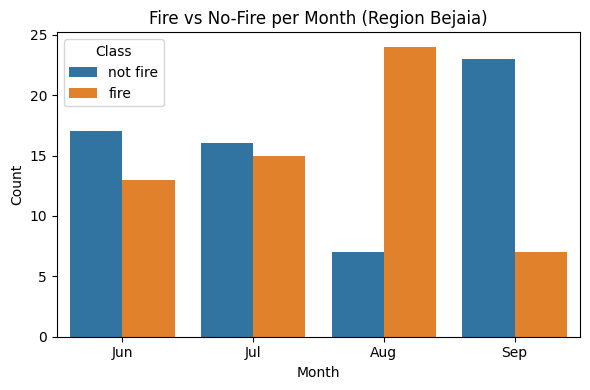

In [19]:
region_0 = data[data['Region'] == 0]

region_0['month'] = region_0['month'].map({6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep'})

plt.figure(figsize=(6,4))
sns.countplot(data=region_0, x='month', hue='Classes')
plt.title('Fire vs No-Fire per Month (Region Bejaia)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

## 14. Analyzing Fire Distribution in Region 1 (Sidi Bel-abbesBejaia) by Month 🔥🗺️

C:\Users\shrey\AppData\Local\Temp\ipykernel_22016\716925320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_0['month'] = region_0['month'].map({6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep'})


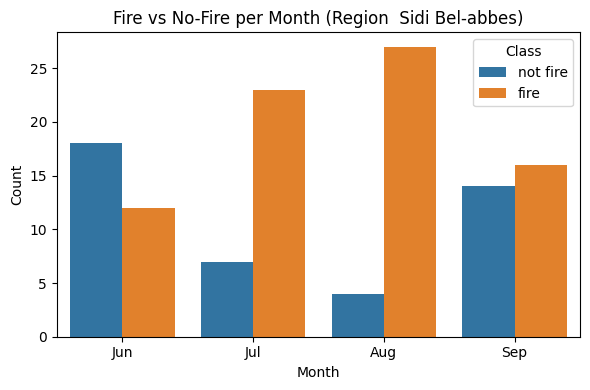

In [20]:
region_0 = data[data['Region'] == 1]

region_0['month'] = region_0['month'].map({6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep'})

plt.figure(figsize=(6,4))
sns.countplot(data=region_0, x='month', hue='Classes')
plt.title('Fire vs No-Fire per Month (Region  Sidi Bel-abbes)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

## 14. Encoding Categorical Target Variable (Classes) 🏷️


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classes'] = le.fit_transform(data['Classes'])

In [22]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0.0


## drop the columns which are not required for model building


In [23]:
df=data.drop(columns=['day','month','year'])

## 15. Visualizing Feature Correlations with a Heatmap 📈🌡️

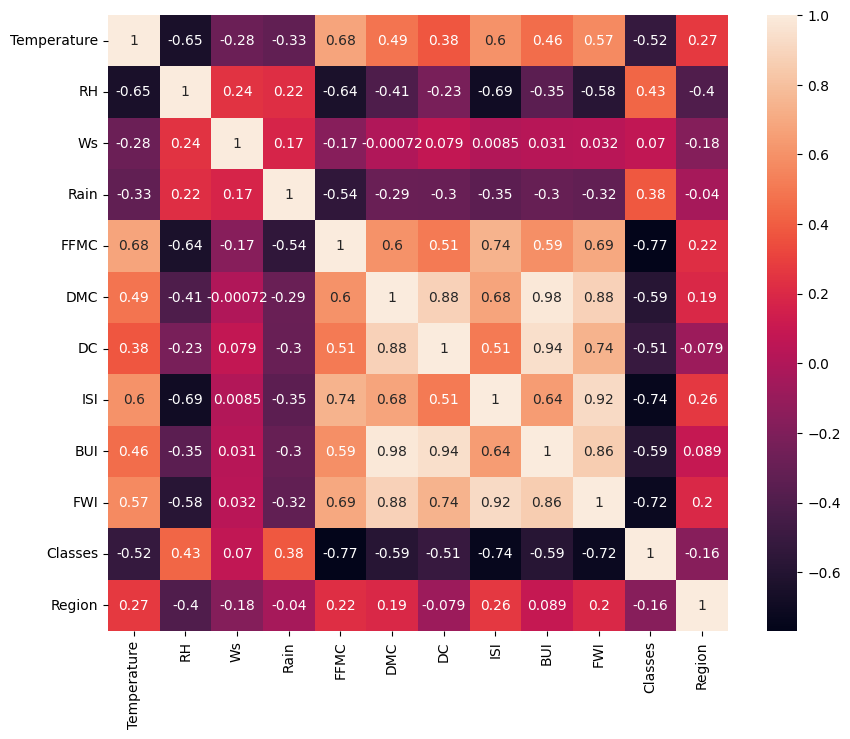

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## 16. dividing into dependent and independent features

In [25]:
# dividing into dependent and independent features
X = df.drop("FWI",axis=1)
y = df['FWI']

## 17. feature selection based on correlaton

In [26]:
# feature selection based on correlaton
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [27]:
print(correlation(df,0.85))

{'BUI', 'FWI', 'DC'}


In [28]:
df=df.drop(df[['DC','ISI','BUI']],axis=1)

## 18. test_train_split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# feature scaling for Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

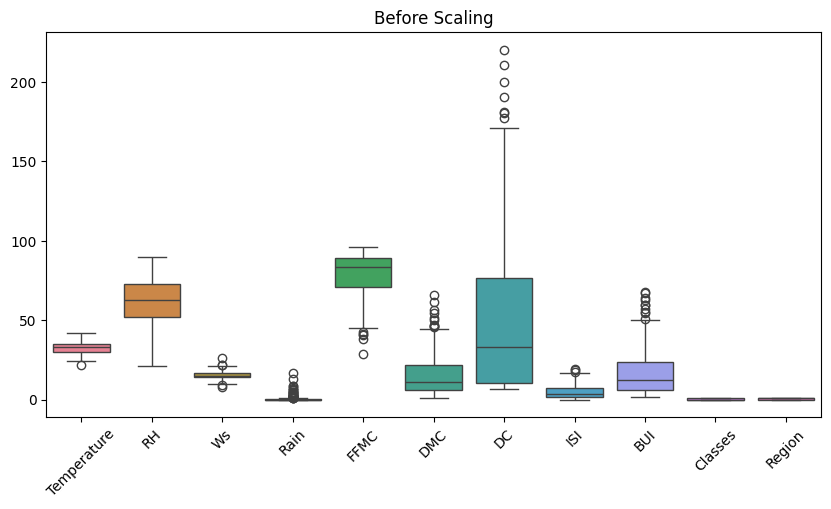

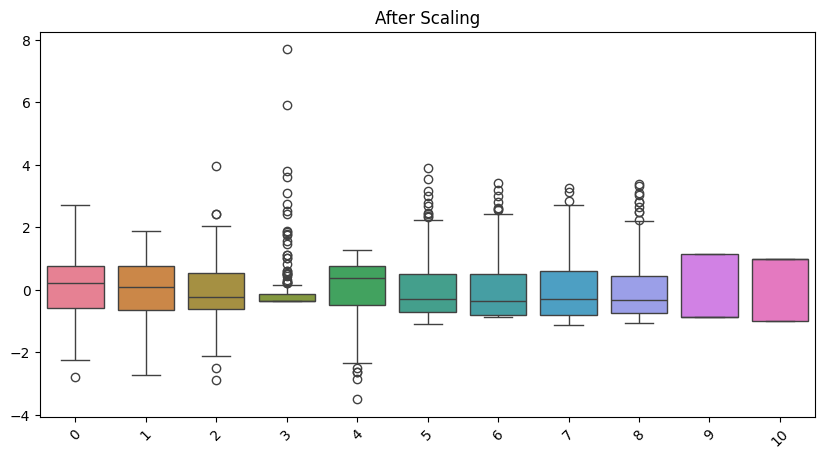

In [32]:
# box plot to see the difference
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_train)
plt.title("Before Scaling")
plt.xticks(rotation=45)
plt.show()

# Scaled data
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_train_scaled)
plt.title("After Scaling")
plt.xticks(rotation=45)
plt.show()


0.33231115384863874
0.9890356825759857


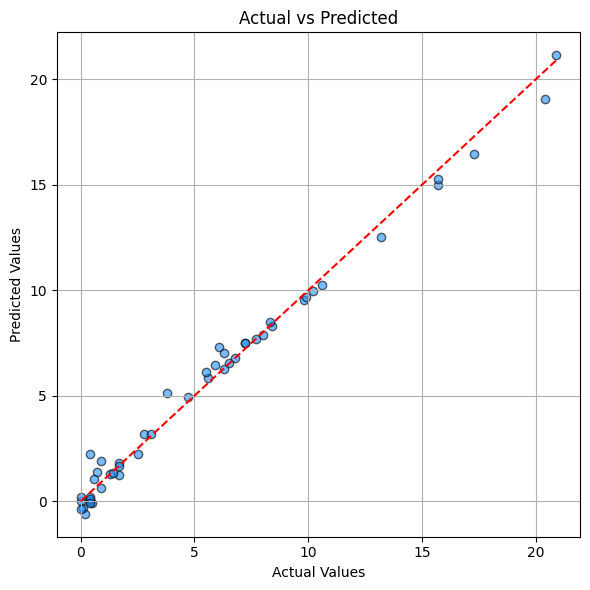

In [33]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_prdt= lr.predict(X_test_scaled)
score = r2_score(y_test,y_prdt)
mse = mean_squared_error(y_test,y_prdt)
print(mse)
print(score)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_prdt, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.grid(True)
plt.tight_layout()
plt.show()

1.4308089977464677
0.9527917018651334


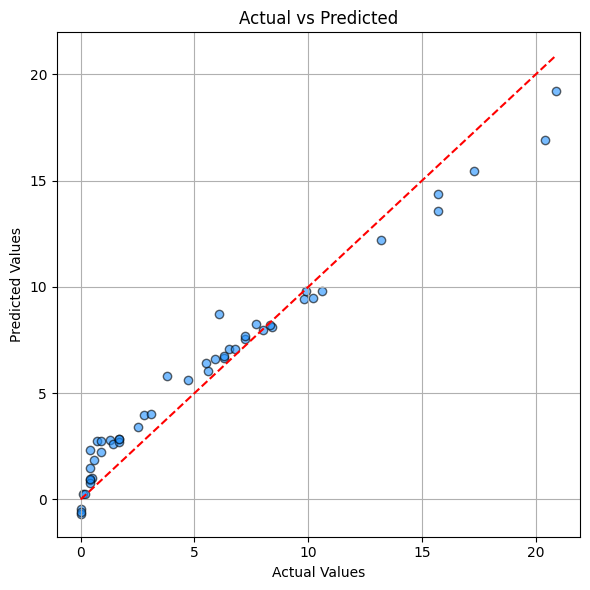

In [34]:
# Lasso Regrresion Model
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_prdt= lasso.predict(X_test_scaled)
score = r2_score(y_test,y_prdt)
mse = mean_squared_error(y_test,y_prdt)
print(mse)
print(score)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_prdt, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.grid(True)
plt.tight_layout()
plt.show()

0.35615975662447397
0.9882488186747138


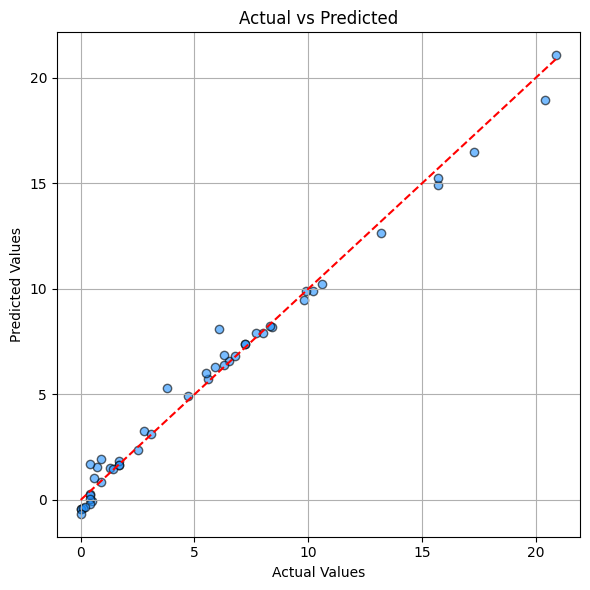

In [35]:
# cross validation lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
y_prdt= lasso_cv.predict(X_test_scaled)
score = r2_score(y_test,y_prdt)
mse = mean_squared_error(y_test,y_prdt)
print(mse)
print(score)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_prdt, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.grid(True)
plt.tight_layout()
plt.show()

0.46941142964419946
0.9845121782477888


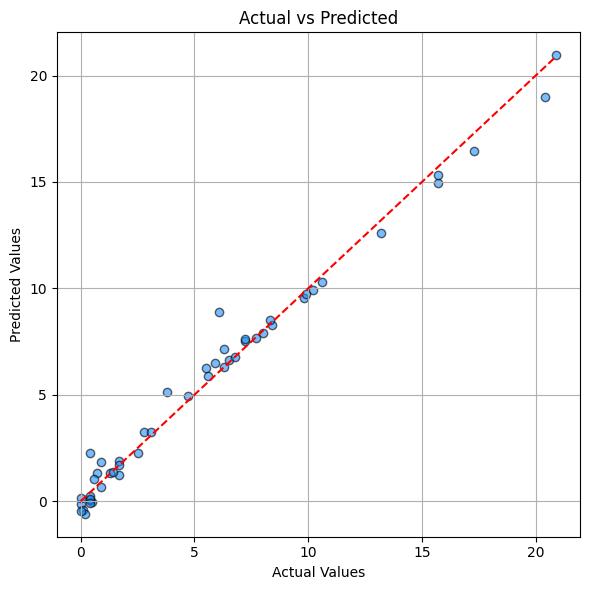

In [36]:
# Ridge Regrresion Model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_prdt = ridge.predict(X_test_scaled)
score = r2_score(y_test,y_prdt)
mse = mean_squared_error(y_test,y_prdt)
print(mse)
print(score)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_prdt, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.grid(True)
plt.tight_layout()
plt.show()

3.548789306268316
0.8829107841423941


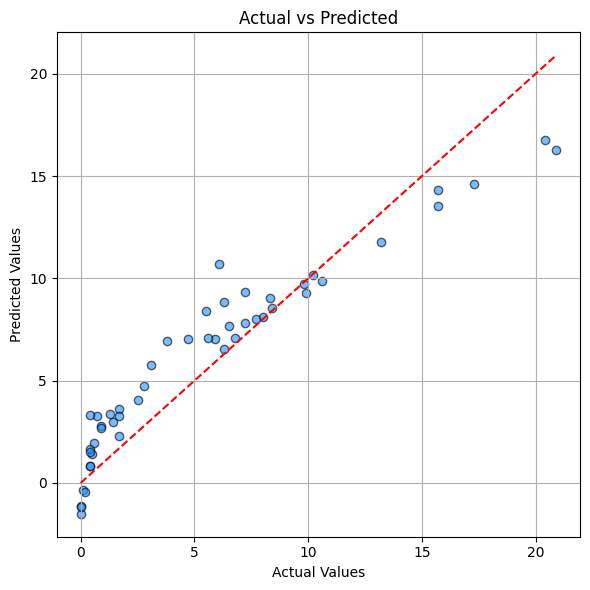

In [37]:
# Elasticnet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_prdt = elasticnet.predict(X_test_scaled)
score = r2_score(y_test,y_prdt)
mse = mean_squared_error(y_test,y_prdt)
print(mse)
print(score)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_prdt, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
# from the above ridge regression is the best model
import pickle
pickle.dump(ridge,open('model.pkl','wb'))
pickle.dump(sc,open('scaler.pkl','wb'))